In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Explanation of the Variables  

**Age:** age of the patient [years]  

**Sex:** sex of the patient [M: Male, F: Female]  

**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  

**RestingBP:** resting blood pressure [mm Hg]  

**Cholesterol:** serum cholesterol [mm/dl]  

**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  

**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]  

**ExerciseAngina:** exercise-induced angina (chest pain) [Y: Yes, N: No] 

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]  

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  

**HeartDisease:** output class [1: heart disease, 0: Normal]

## Exploratory Data Analysis

In [4]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
cat_cols = ['Sex', 'ChestPainType','ExerciseAngina', 'ST_Slope']

In [5]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Exploring the Categorical Variables

In [6]:
heart.astype('object').describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918,918,918,918,918,918,918,918,918,918.0,918,918
unique,50,2,4,67,222,2,3,119,2,53.0,3,2
top,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1
freq,51,725,496,132,172,704,552,43,547,368.0,460,508


/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/1544383944.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=heart, palette='Set2')
/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/1544383944.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=heart, palette='Set2')
/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/1544383944.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=heart, palette='Set2')
/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipyker

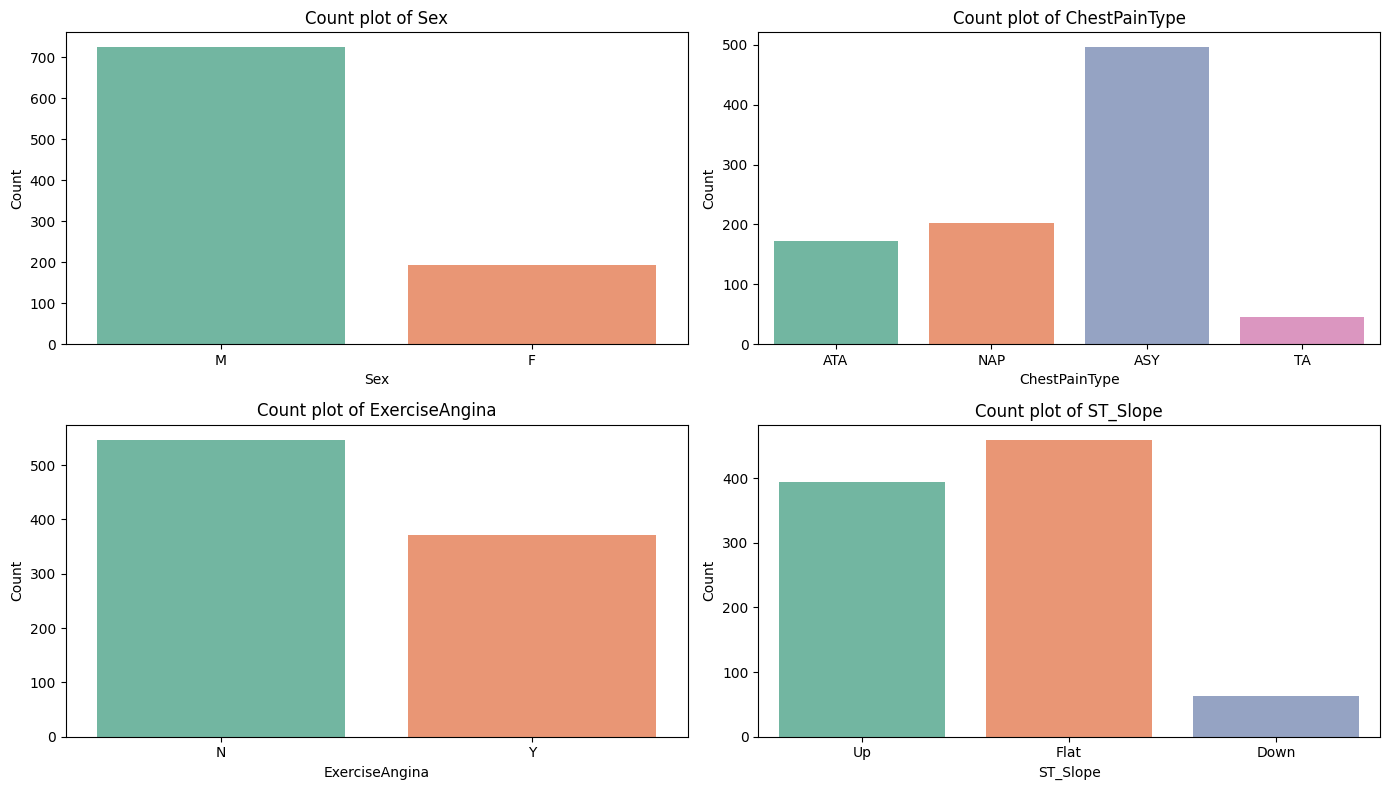

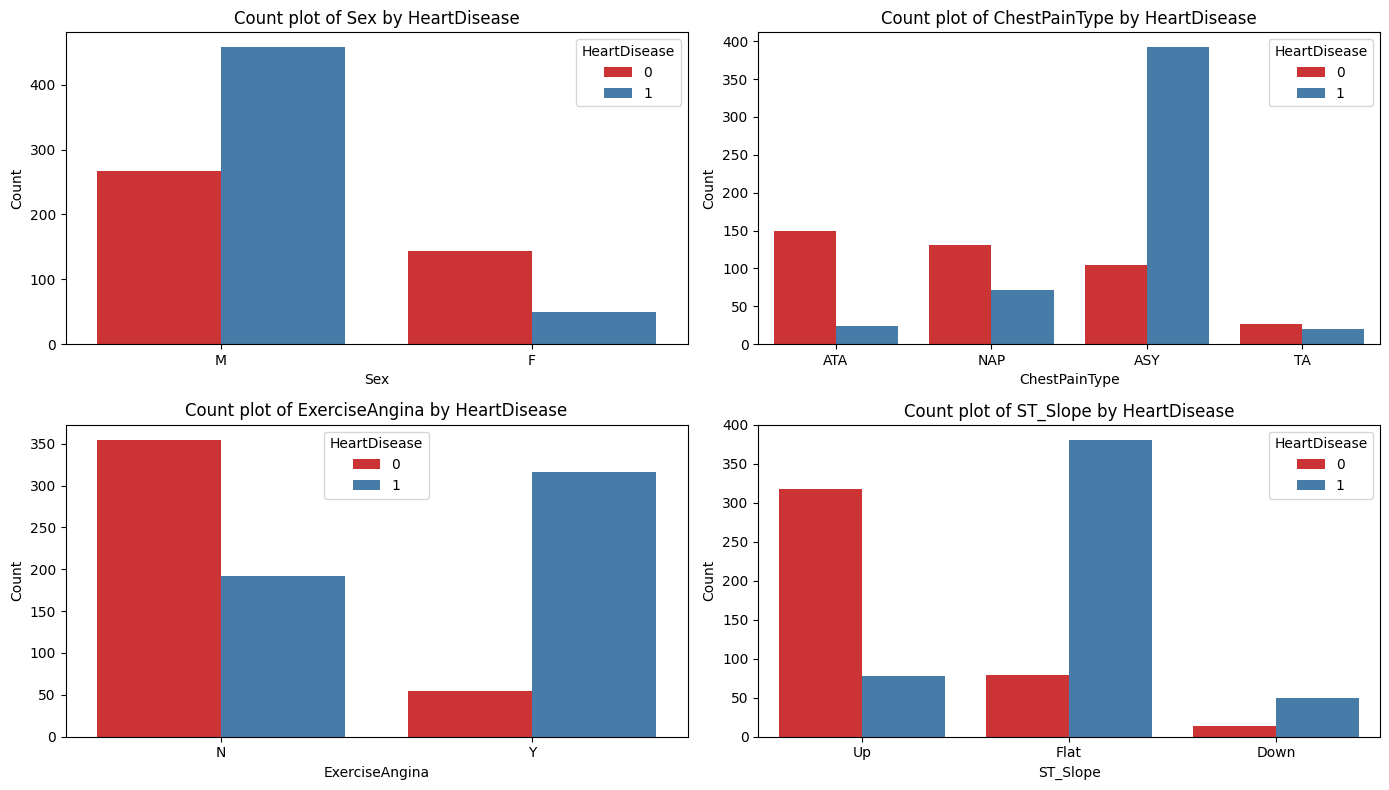

In [7]:
### These exploratory plots were generated with the help of co-pilot.

plt.figure(figsize=(14, 8))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=heart, palette='Set2')
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='HeartDisease', data=heart, palette='Set1')
    plt.title(f'Count plot of {col} by HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Based on these exploratory graphs, there are a few things we can learn from the dataset. 

Most of the patients in this dataset are male. Additionally, most people do not have exercised induced angina. The majority of chest pain types are asymptomatic as well.

Exploring the Numerical Variables

In [8]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


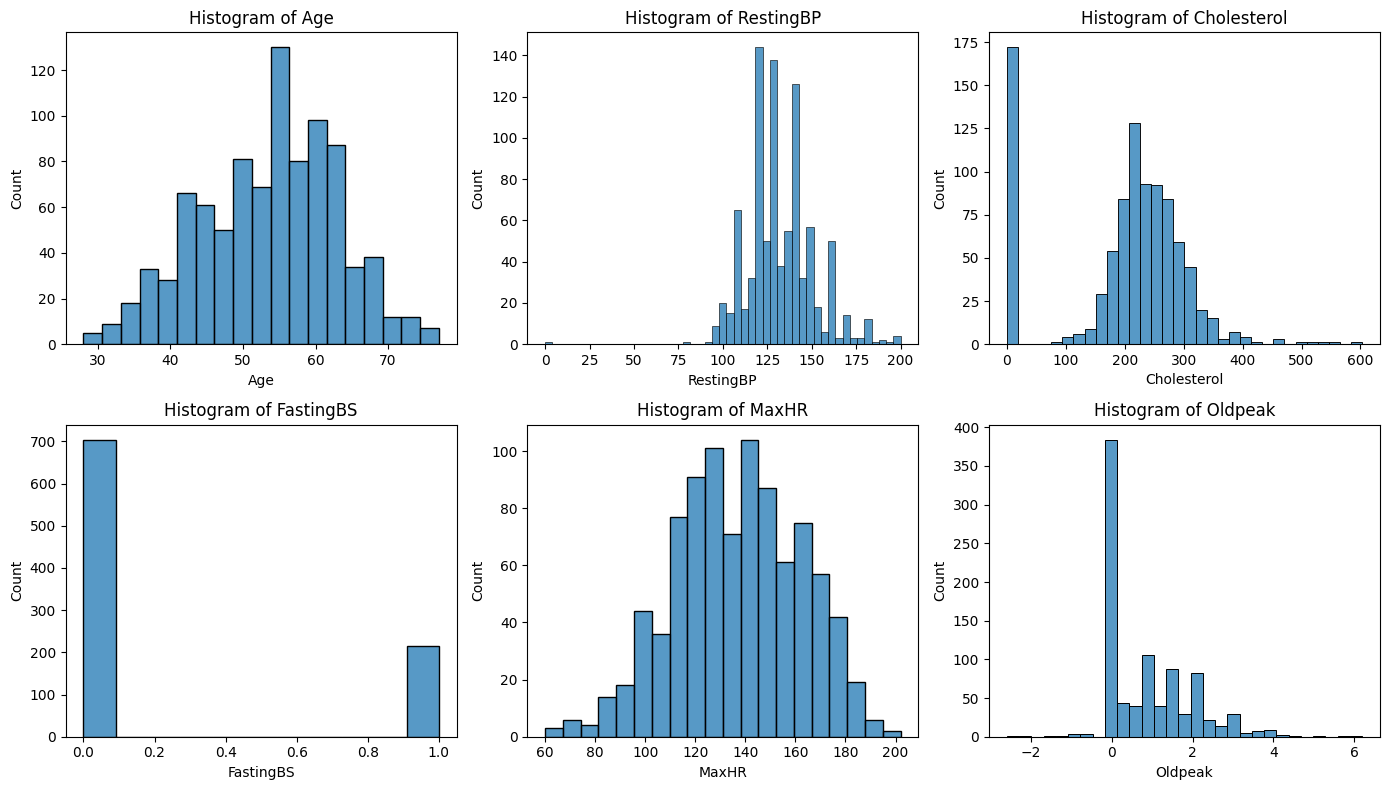

In [9]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(heart[col])
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


Based on the exploration of numerical variables, there are a few things that we can learn from the dataset. 

The variables MaxHR, age, and cholesterol, are largely normally distributed. Oldpeak, which is the depression of the ST curve (in an ECG) induced by exercise relative to rest is a bit right skewed, indicating that the mean is greater than the median.



## What categorical variable is the strongest predictor of heart failure?

In [10]:
numerical_vars = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_vars = ['Sex', 'ChestPainType','ExerciseAngina', 'ST_Slope']

In [11]:
###Creating a function that fits a logistic regression model and returns the model object
def fit_logistic_regression(formula, data):
    model = smf.logit(formula, data=data).fit()
    return model

###Fitting a logistic regression model for each numerical variable using the previously defined columns
results = {}
for var in categorical_vars:
    formula = f"HeartDisease ~ {var}"
    model = fit_logistic_regression(formula, heart)
    results[var] = {
        'model': model,
        'p_value': model.pvalues[1:].min(),  # p-value of the variable (skip intercept) (this was done with the help of co-pilot)
        'pseudo_r2': model.prsquared
    }

###Printing the results of the logistic regression model
for var, result in results.items():
    print(f"Variable Name: {var}")
    print(f"p-value: {result['p_value']:.4f}")
    print(f"Pseudo R-squared: {result['pseudo_r2']:.4f}")
    print()

Optimization terminated successfully.
         Current function value: 0.639961
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531450
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.555758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479965
         Iterations 5
Variable Name: Sex
p-value: 0.0000
Pseudo R-squared: 0.0691

Variable Name: ChestPainType
p-value: 0.0000
Pseudo R-squared: 0.2269

Variable Name: ExerciseAngina
p-value: 0.0000
Pseudo R-squared: 0.1916

Variable Name: ST_Slope
p-value: 0.0000
Pseudo R-squared: 0.3018



In [12]:
results_df = pd.DataFrame.from_dict(results, orient='index')

results_df

,model,p_value,pseudo_r2
Sex,<statsmodels.discrete.discrete_model.BinaryRes...,1.859546e-18,0.069064
ChestPainType,<statsmodels.discrete.discrete_model.BinaryRes...,1.384952e-37,0.226913
ExerciseAngina,<statsmodels.discrete.discrete_model.BinaryRes...,3.004136e-43,0.191552
ST_Slope,<statsmodels.discrete.discrete_model.BinaryRes...,6.174683e-16,0.301807


The results show that all the categorical variables are significant in predicting heart disease. The p-values are less than 0.05, which indicates that the variables are statistically significant.

The specific variables are as follows:
Variable: Sex
P-value: 0.0000
Pseudo R-squared: 0.0691

Variable: ChestPainType
P-value: 0.0000
Pseudo R-squared: 0.2269

Variable: ExerciseAngina
P-value: 0.0000
Pseudo R-squared: 0.1916

Variable: ST_Slope
P-value: 0.0000
Pseudo R-squared: 0.3018

## Which numerical variable is the strongest predictor of heart failure?

In [13]:
results_num = {}
for var in numerical_vars:
    formula = f"HeartDisease ~ {var}"
    model = fit_logistic_regression(formula, heart)
    results_num[var] = {
        'model': model,
        'p_value': model.pvalues[1],  # p-value of the variable (skip intercept)
        'pseudo_r2': model.prsquared
    }

for var, result in results_num.items():
    print(f"Variable: {var}")
    print(f"P-value: {result['p_value']:.4f}")
    print(f"Pseudo R-squared: {result['pseudo_r2']:.4f}")
    print()

Optimization terminated successfully.
         Current function value: 0.646372
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.681572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600772
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592888
         Iterations 6
Variable: Age
P-value: 0.0000
Pseudo R-squared: 0.0597

Variable: RestingBP
P-value: 0.0013
Pseudo R-squared: 0.0085

Variable: Cholesterol
P-value: 0.0000
Pseudo R-squared: 0.0411

Variable: MaxHR
P-value: 0.0000
Pseudo R-squared: 0.1261

Variable: Oldpeak
P-value: 0.0000
Pseudo R-squared: 0.1375



/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/2095614762.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p_value': model.pvalues[1],  # p-value of the variable (skip intercept)
/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/2095614762.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p_value': model.pvalues[1],  # p-value of the variable (skip intercept)
/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/2095614762.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

The results for the numerical variables are as follows:

Variable: Age
P-value: 0.0000
Pseudo R-squared: 0.0597

Variable: RestingBP
P-value: 0.0013
Pseudo R-squared: 0.0085

Variable: Cholesterol
P-value: 0.0000
Pseudo R-squared: 0.0411

Variable: MaxHR
P-value: 0.0000
Pseudo R-squared: 0.1261

Variable: Oldpeak
P-value: 0.0000
Pseudo R-squared: 0.1375

In [14]:
results_num_df = pd.DataFrame.from_dict(results_num, orient='index')

results_num_df

,model,p_value,pseudo_r2
Age,<statsmodels.discrete.discrete_model.BinaryRes...,1.610896e-16,0.059737
RestingBP,<statsmodels.discrete.discrete_model.BinaryRes...,1.258480e-03,0.008533
Cholesterol,<statsmodels.discrete.discrete_model.BinaryRes...,8.750877e-12,0.041059
MaxHR,<statsmodels.discrete.discrete_model.BinaryRes...,1.084487e-29,0.126072
Oldpeak,<statsmodels.discrete.discrete_model.BinaryRes...,1.233805e-29,0.137540


## Visualizations

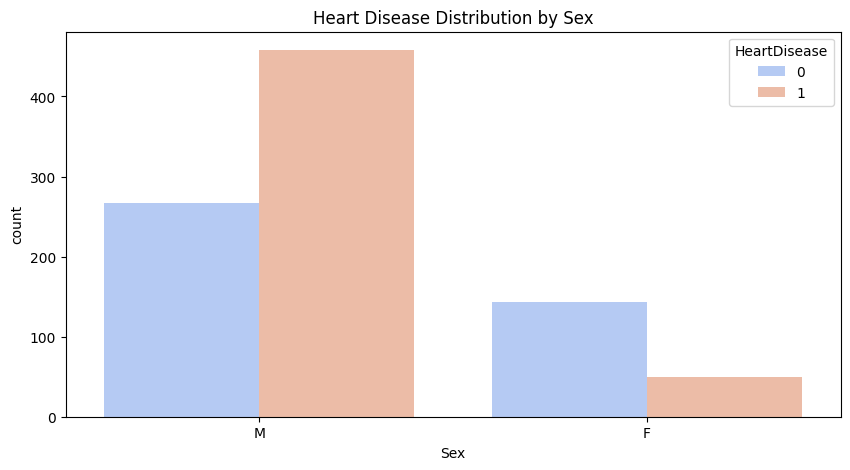

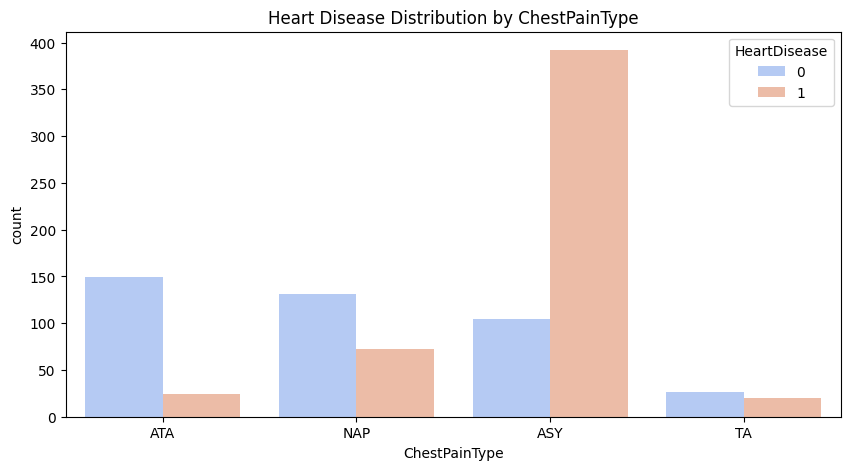

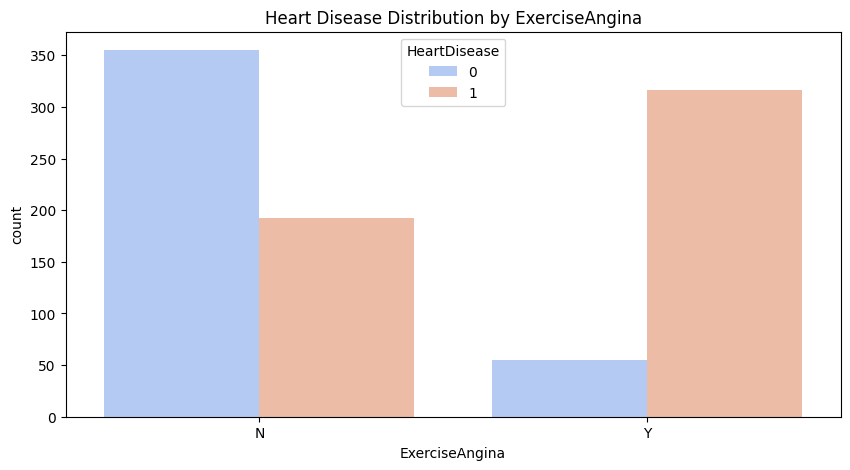

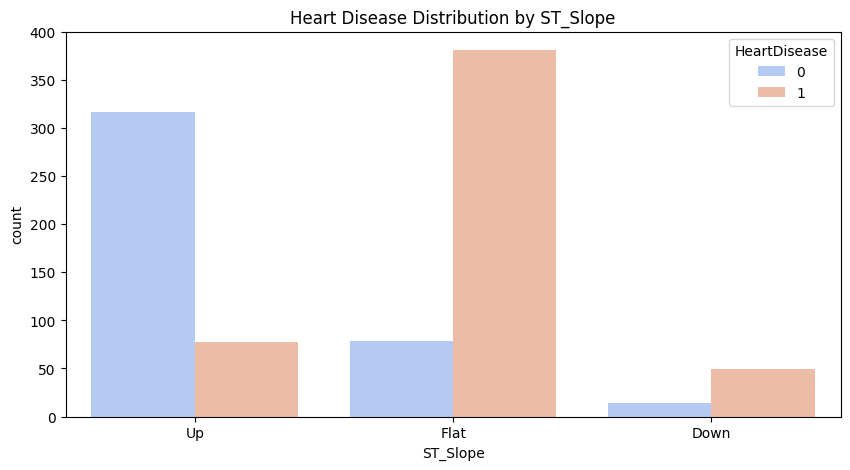

In [17]:
### Creating numerous bar graphs to show the count of heart disease split by the categorical variables

for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, hue='HeartDisease', data=heart, palette = 'coolwarm')
    plt.title(f'Heart Disease Distribution by {var}')
    plt.show()

/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/1260457406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=var, data=heart, palette = 'muted')


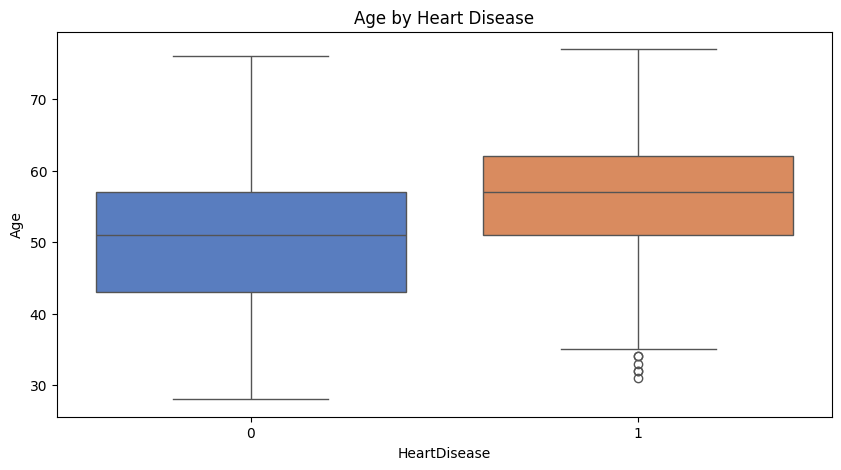

/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/1260457406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=var, data=heart, palette = 'muted')


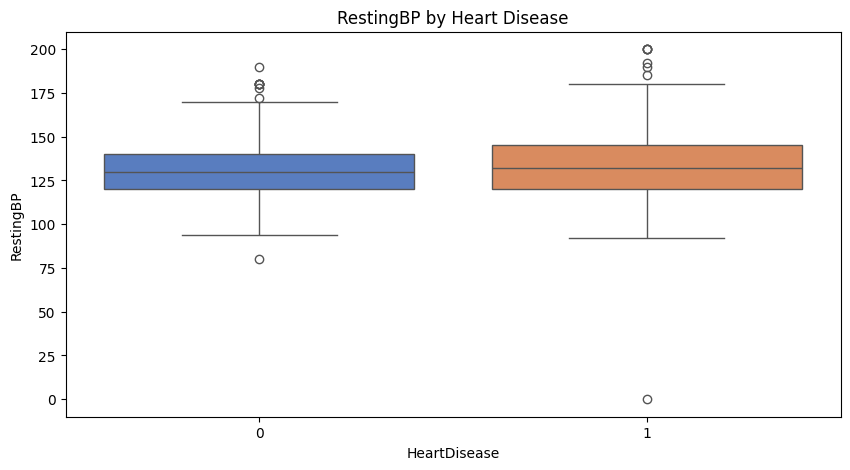

/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/1260457406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=var, data=heart, palette = 'muted')


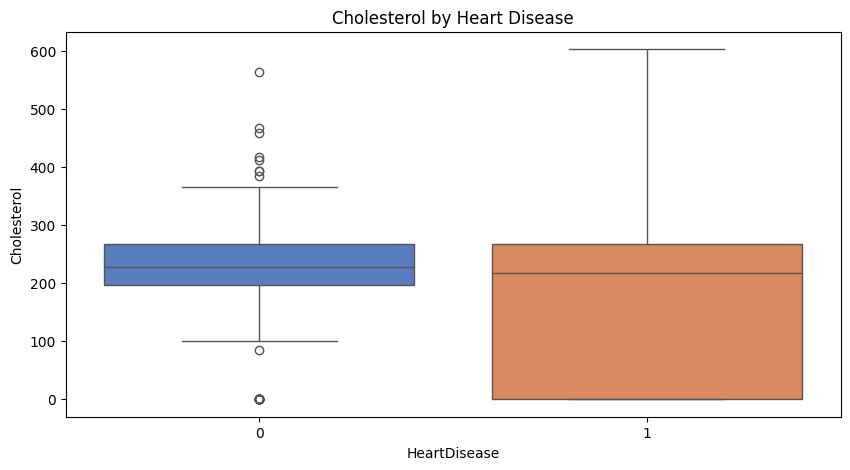

/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/1260457406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=var, data=heart, palette = 'muted')


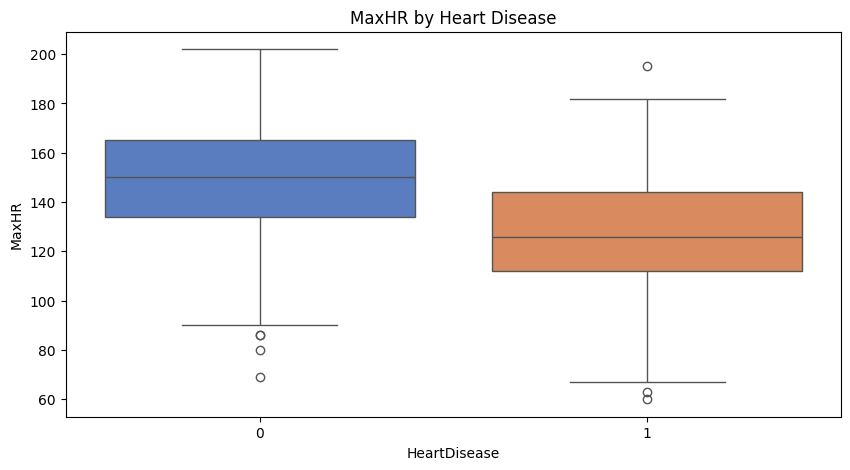

/var/folders/fg/6c6fbnns7txcs5w_b8qr1wvm0000gn/T/ipykernel_3097/1260457406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=var, data=heart, palette = 'muted')


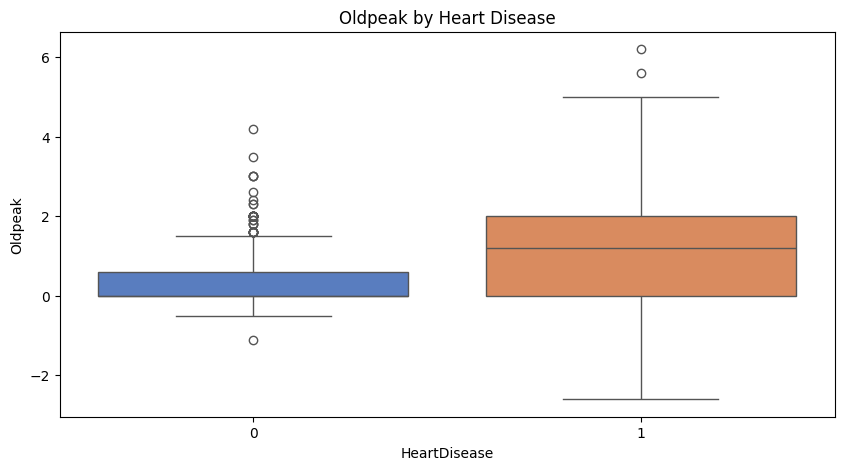

In [18]:
### Creating numerous box plots to show the distribution of the numerical variables split by heart disease

for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='HeartDisease', y=var, data=heart, palette = 'muted')
    plt.title(f'{var} by Heart Disease')
    plt.show()